## Installation guide of auto-sklearn for AUTOML

Let's install the auto-sklearn package in your kaggle notebook environment!  
The auto-sklearn package is for automl  
Please enter the [link](https://automl.github.io/auto-sklearn/master/index.html) for detailed explanation of usages  
Firstly, please turn on the internet in your kaggle notebook environment  





Example)
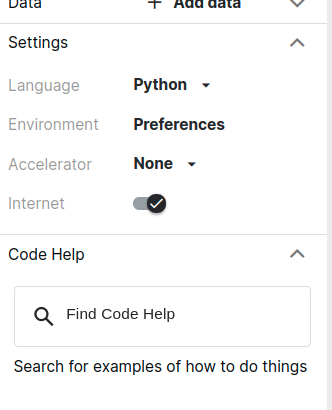

In [ ]:
!apt-get remove swig

In [ ]:
!apt-get install swig3.0 build-essential -y

In [ ]:
!ln -s /usr/bin/swig3.0 /usr/bin/swig

In [ ]:
!apt-get install build-essential

In [ ]:
!pip install --upgrade setuptools

In [ ]:
!pip install auto-sklearn

Let's check the autosklearn installation status

In [ ]:
import autosklearn.regression

It looks like we need to update scikit-learn version  
We need sckicit-learn version >= 0.24.0

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip freeze | grep scikit-learn

Now, scikit-learn version is updated.  
Please restart the kernel!

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

Let's run regression example!

In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression


if __name__ == "__main__":
    ############################################################################
    # Data Loading
    # ============

    X, y = sklearn.datasets.load_boston(return_X_y=True)

    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)

    ############################################################################
    # Build and fit a regressor
    # =========================

    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn_regression_example_tmp',
        output_folder='/tmp/autosklearn_regression_example_out',
    )
    automl.fit(X_train, y_train, dataset_name='boston')

    ############################################################################
    # Print the final ensemble constructed by auto-sklearn
    # ====================================================

    print(automl.show_models())

    ###########################################################################
    # Get the Score of the final ensemble
    # ===================================

    predictions = automl.predict(X_test)
    print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))